<a href="https://colab.research.google.com/github/Geonwoo1109/Python_BigData/blob/main/%EB%B0%9C%ED%91%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글 폰트, 라이브러리

In [ ]:
# 한글 표현
!apt -qq -y install fonts-nanum
%config InlineBackend.figure_format = 'retina'

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
print(nanum_font)

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

# https://www.kaggle.com/johnharshith/hollywood-theatrical-market-synopsis-1995-to-2021
# https://www.kaggle.com/imdevskp/corona-virus-report?select=day_wise.csv

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
nanum_font number: 10
['/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf']
NanumBarunGothic


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 할리우드 정보 가져오기

In [ ]:
# 1995~ 할리우드 매출액
movie = pd.read_csv("/content/drive/MyDrive/우송대 2022/Hollywood Theatrical Market Synopsis 1995 to 2021/AnnualTicketSales.csv")
movie.info()
movie.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   YEAR                                 27 non-null     int64  
 1   TICKETS SOLD                         27 non-null     object 
 2   TOTAL BOX OFFICE                     27 non-null     object 
 3   TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     object 
 4   AVERAGE TICKET PRICE                 27 non-null     object 
 5   Unnamed: 5                           0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ KB


,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


In [ ]:
def remover(n):
  return int(n.replace("$", "").replace(",",""))

In [ ]:
movie['total'] = movie['TOTAL BOX OFFICE'].apply(remover)
movie.info()
movie.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   YEAR                                 27 non-null     int64  
 1   TICKETS SOLD                         27 non-null     object 
 2   TOTAL BOX OFFICE                     27 non-null     object 
 3   TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     object 
 4   AVERAGE TICKET PRICE                 27 non-null     object 
 5   Unnamed: 5                           0 non-null      float64
 6   total                                27 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ KB


,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5,total
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN,3881777912
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN,2048534616
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN,11253443955
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN,11948096650
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN,10993991460


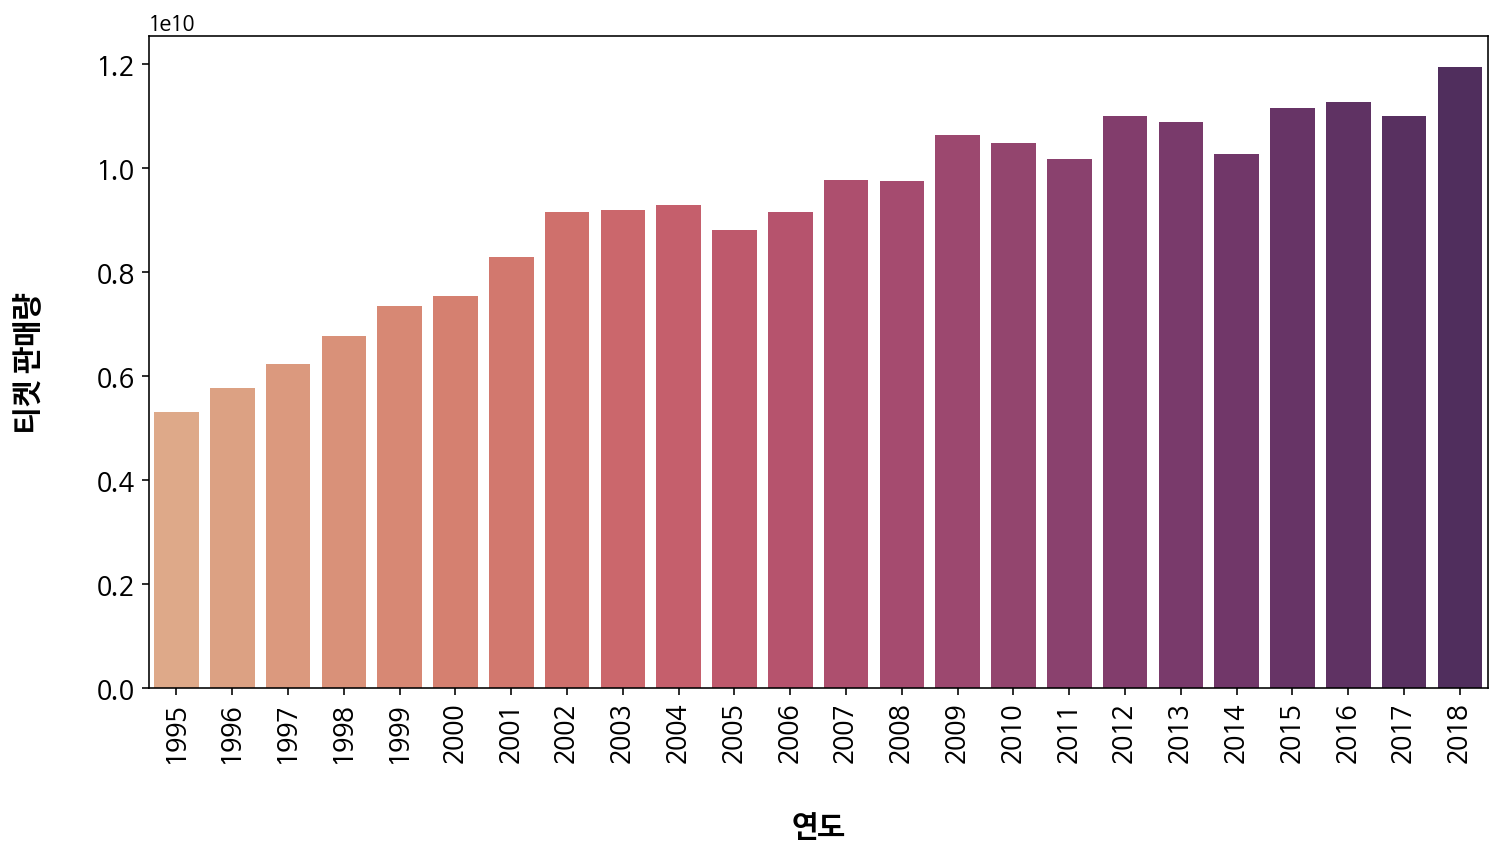

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='YEAR',y='total',data=movie.tail(-3), palette='flare')
plt.xlabel("연도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("티켓 판매량", fontweight='bold',fontsize= 15, labelpad = 25)
plt.xticks(fontsize = 13, rotation = 90) #.
plt.yticks(fontsize = 13)  
plt.savefig("test.png", dpi=200)

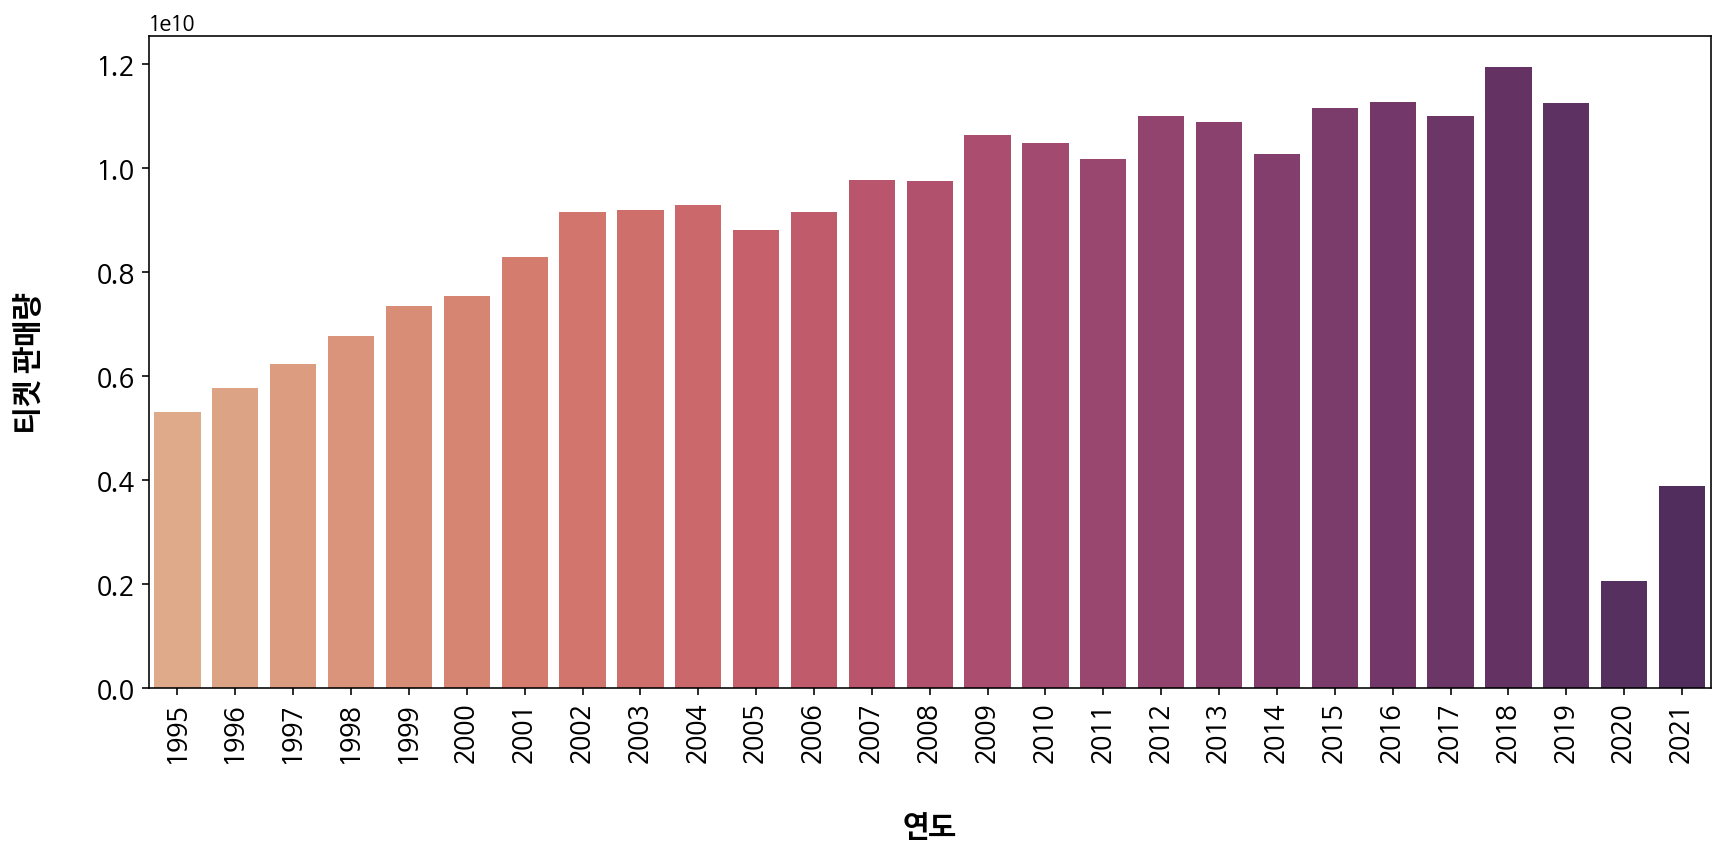

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x='YEAR',y='total',data=movie, palette='flare')
plt.xlabel("연도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("티켓 판매량", fontweight='bold',fontsize= 15, labelpad = 25)
plt.xticks(fontsize = 13, rotation = 90) #.
plt.yticks(fontsize = 13)
plt.savefig("test.png", dpi=200)

# 코로나 정보 가져오기

In [ ]:
covid = pd.read_csv("/content/drive/MyDrive/우송대 2022/worldwide-aggregate.csv")
covid

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,557,30,17,NaN
1,2020-01-23,655,32,18,17.594255
2,2020-01-24,941,39,26,43.664122
3,2020-01-25,1434,42,42,52.391073
4,2020-01-26,2118,56,56,47.698745
...,...,...,...,...,...
719,2022-01-10,310700502,0,5496078,1.036111
720,2022-01-11,313578302,0,5504390,0.926230
721,2022-01-12,317279945,0,5513619,1.180453
722,2022-01-13,320099518,0,5520810,0.888670


In [ ]:
covid["year"] = covid["Date"].str.split("-", expand=True)[0]
covid["month"] = covid["Date"].str.split("-", expand=True)[1]
covid

,Date,Confirmed,Recovered,Deaths,Increase rate,year,month
0,2020-01-22,557,30,17,NaN,2020,01
1,2020-01-23,655,32,18,17.594255,2020,01
2,2020-01-24,941,39,26,43.664122,2020,01
3,2020-01-25,1434,42,42,52.391073,2020,01
4,2020-01-26,2118,56,56,47.698745,2020,01
...,...,...,...,...,...,...,...
719,2022-01-10,310700502,0,5496078,1.036111,2022,01
720,2022-01-11,313578302,0,5504390,0.926230,2022,01
721,2022-01-12,317279945,0,5513619,1.180453,2022,01
722,2022-01-13,320099518,0,5520810,0.888670,2022,01


In [ ]:
movie["covid"] = 0
movie["covid"][0] = covid.loc[(covid["year"] == "2021")]["Confirmed"].sum()
movie["covid"][1] = covid.loc[(covid["year"] == "2020")]["Confirmed"].sum()

movie.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5,total,covid
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN,3881777912,67096934158
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN,2048534616,7644280320
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN,11253443955,0
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN,11948096650,0
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN,10993991460,0


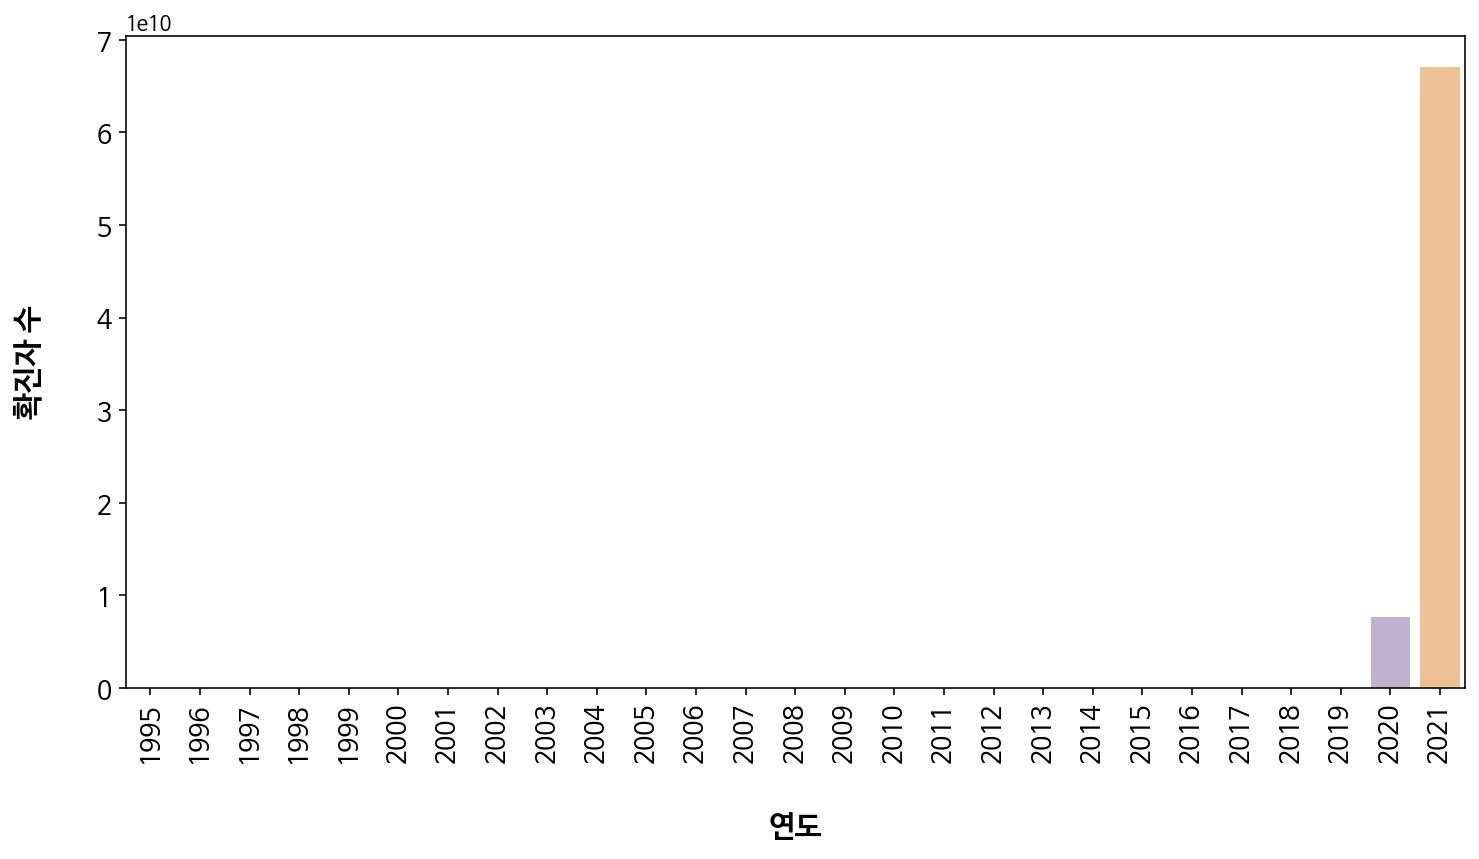

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)

sns.barplot(x='YEAR',y='covid',data=movie, palette='Accent')


plt.xlabel("연도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("확진자 수", fontweight='bold',fontsize= 15, labelpad = 25)
plt.xticks(fontsize = 13, rotation = 90) #.
plt.yticks(fontsize = 13)
plt.savefig("test.png", dpi=200)

In [ ]:
M_covid = covid.groupby(["year", "month"])["Confirmed"].sum().reset_index()
M_covid["YM"] = M_covid["year"] + M_covid["month"]
M_covid.head()

,year,month,Confirmed,YM
0,2020,01,38539,202001
1,2020,02,1672070,202002
2,2020,03,9064473,202003
3,2020,04,63608007,202004
4,2020,05,145269944,202005


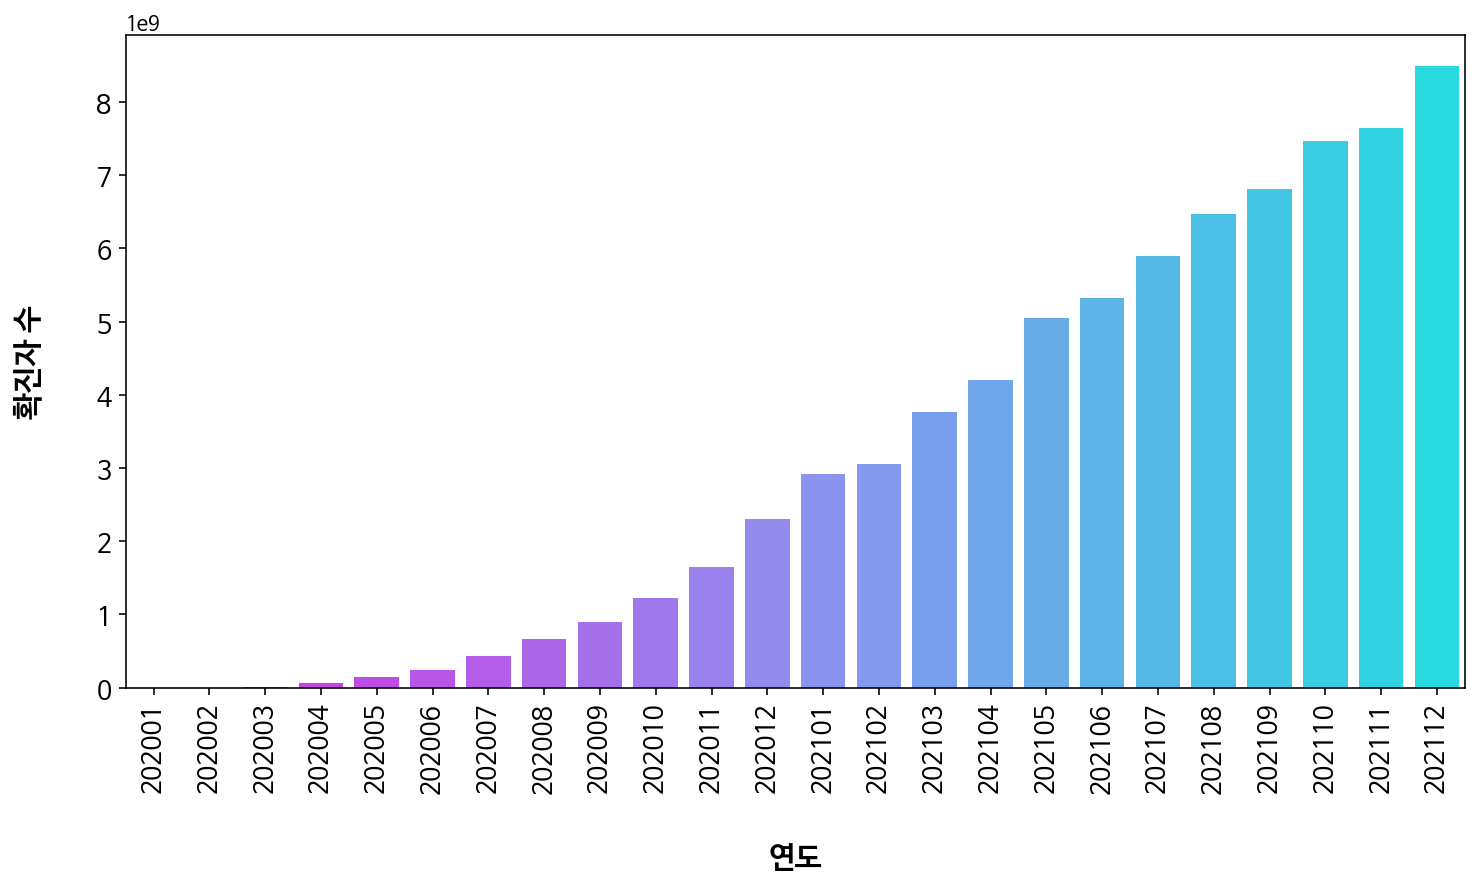

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='YM',y='Confirmed',data=M_covid.head(-1), palette='cool_r')

plt.xlabel("연도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("확진자 수", fontweight='bold',fontsize= 15, labelpad = 25)
plt.xticks(fontsize = 13, rotation = 90) #.
plt.yticks(fontsize = 13) 
plt.savefig("test.png", dpi=200)

# 두 데이터의 상관관계

In [ ]:
movie["P_total"] = movie["total"]/movie["total"].sum()
movie["P_covid"] = movie["covid"]/movie["covid"].sum()

movie[["P_total", "P_covid"]].head()

,P_total,P_covid
0,0.016285,0.897723
1,0.008594,0.102277
2,0.047210,0.000000
3,0.050124,0.000000
4,0.046122,0.000000


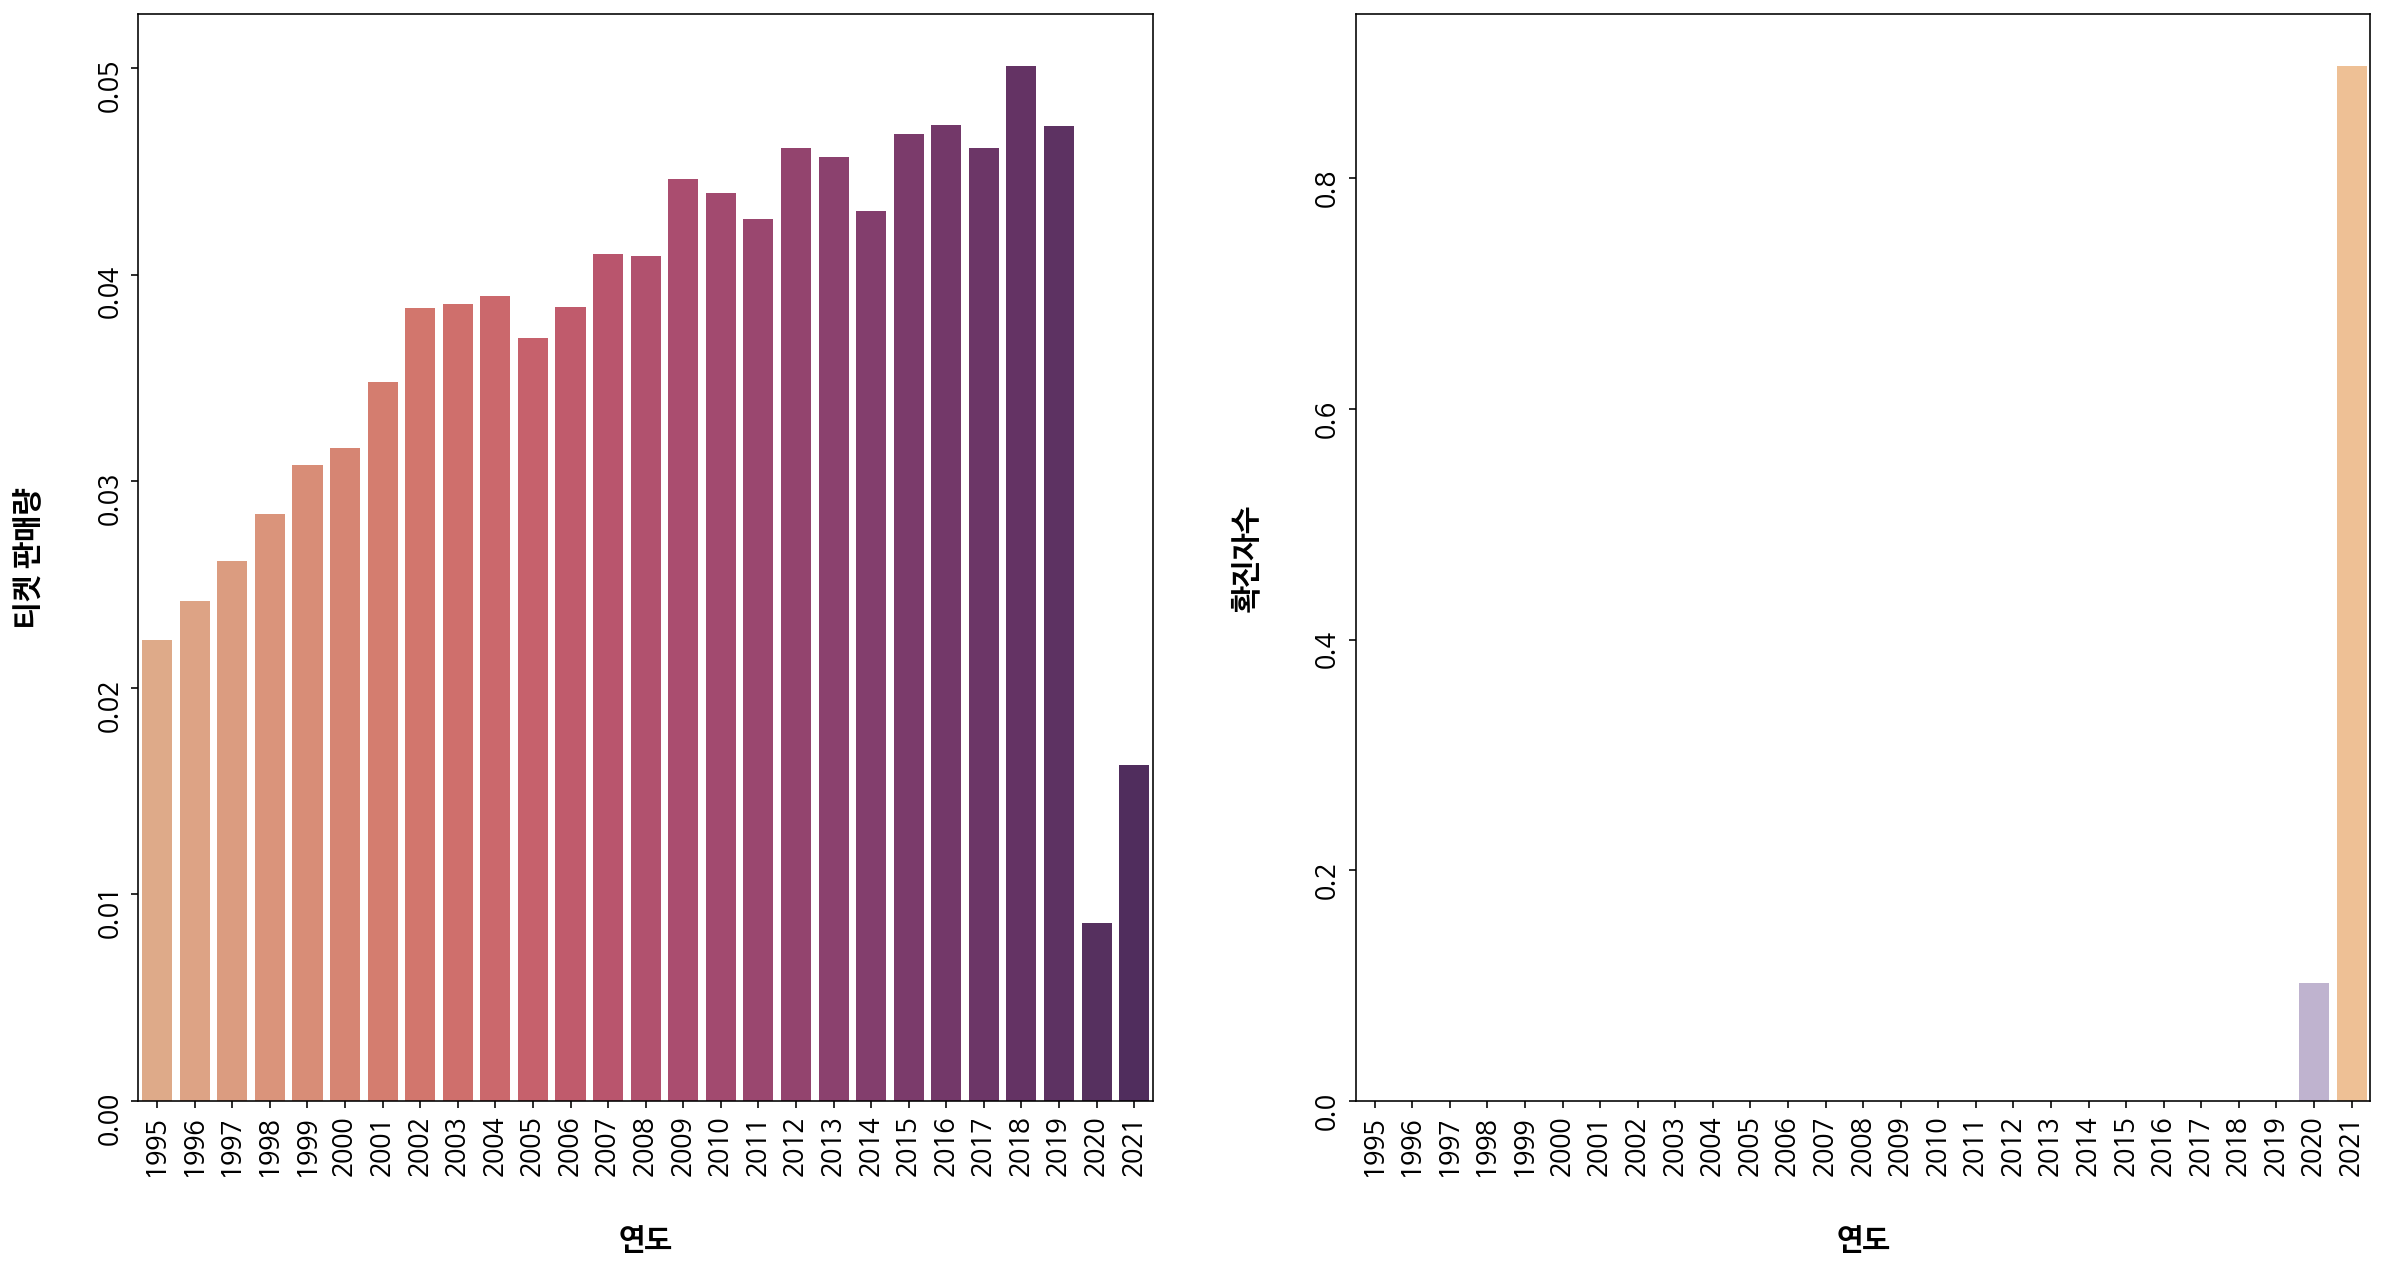

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20, 10))
sns.barplot(x='YEAR',y='P_total',data=movie, palette='flare', ax=ax0)
ax0.set_xlabel("연도", fontweight='bold',fontsize= 15, labelpad = 25)
ax0.set_ylabel("티켓 판매량", fontweight='bold',fontsize= 15, labelpad = 25)
ax0.tick_params(labelsize = 13, rotation = 90)

sns.barplot(x='YEAR',y='P_covid',data=movie, palette='Accent', ax=ax1)
ax1.set_xlabel("연도", fontweight='bold',fontsize= 15, labelpad = 25)
ax1.set_ylabel("확진자수", fontweight='bold',fontsize= 15, labelpad = 25)
ax1.tick_params(labelsize = 13, rotation = 90)

plt.savefig("test.png", dpi=200)

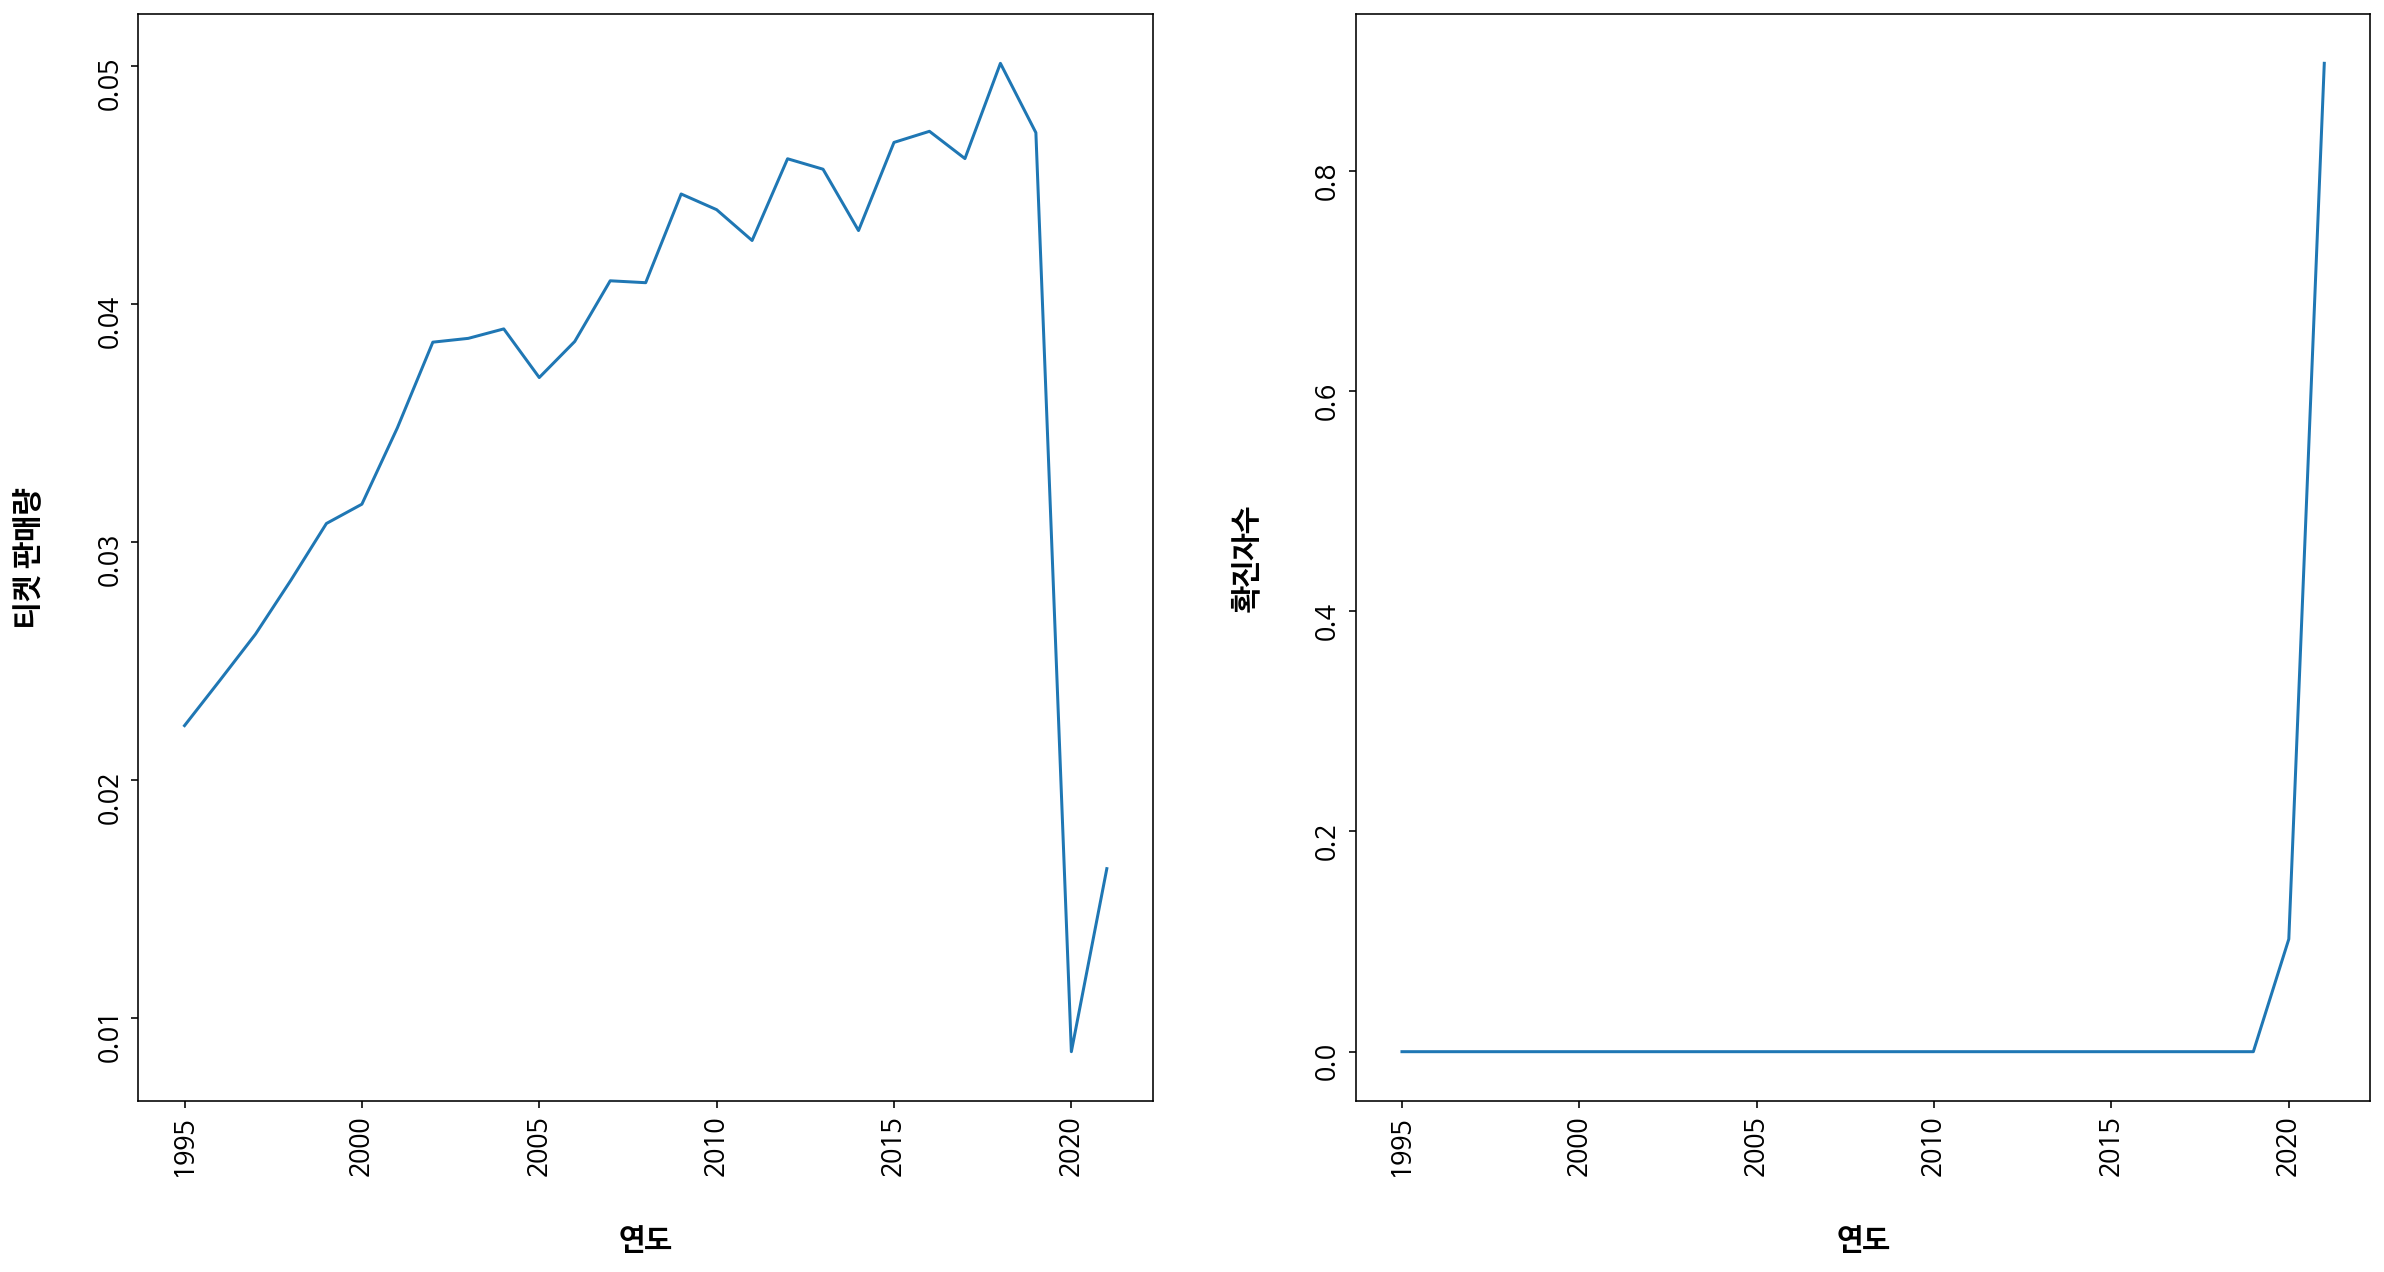

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20, 10))
sns.lineplot(x='YEAR',y='P_total',data=movie, palette='flare', ax=ax0)
ax0.set_xlabel("연도", fontweight='bold',fontsize= 15, labelpad = 25)
ax0.set_ylabel("티켓 판매량", fontweight='bold',fontsize= 15, labelpad = 25)
ax0.tick_params(labelsize = 13, rotation = 90)

sns.lineplot(x='YEAR',y='P_covid',data=movie, palette='Accent', ax=ax1)
ax1.set_xlabel("연도", fontweight='bold',fontsize= 15, labelpad = 25)
ax1.set_ylabel("확진자수", fontweight='bold',fontsize= 15, labelpad = 25)
ax1.tick_params(labelsize = 13, rotation = 90)

plt.savefig("test.png", dpi=200)

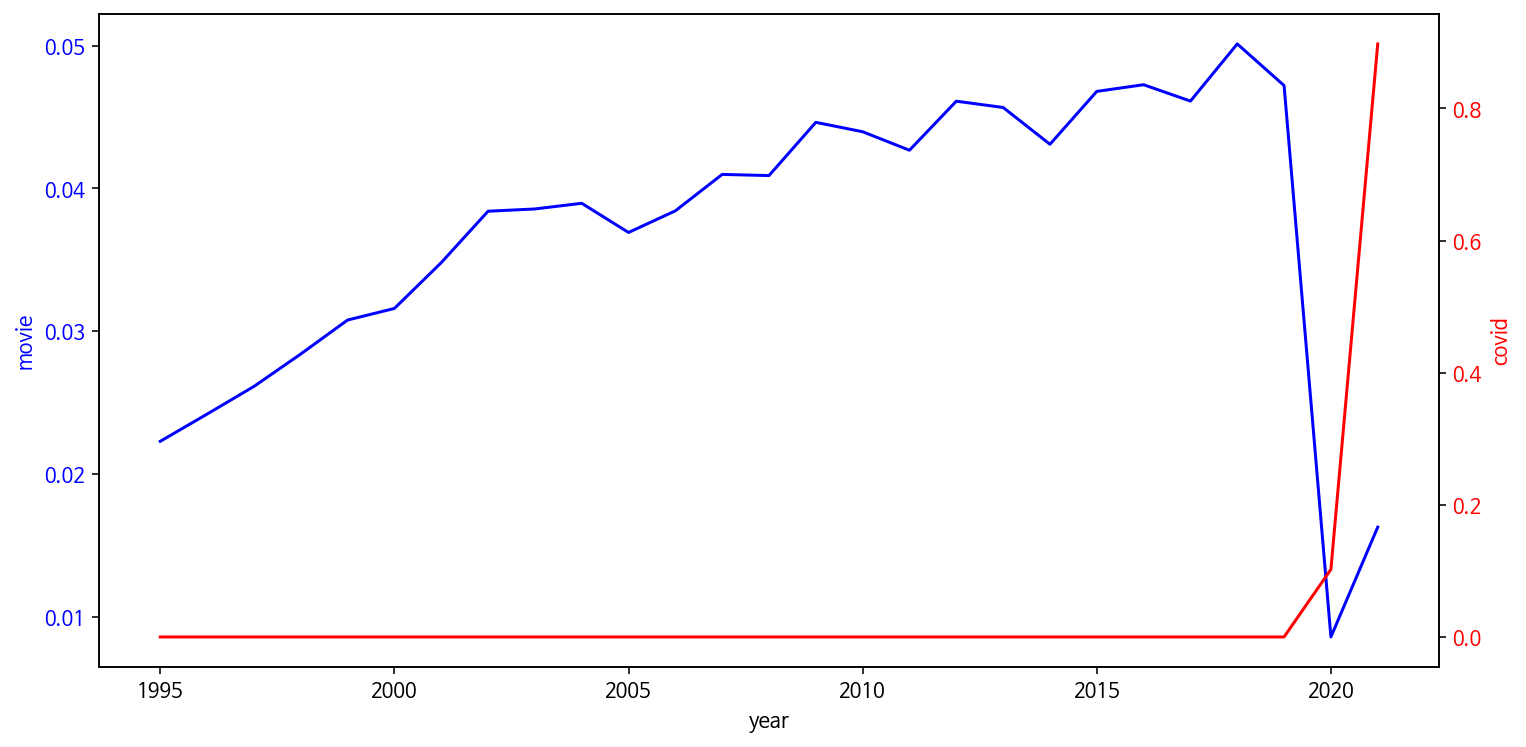

In [ ]:
x = np.arange(0,10, 0.1)
y1 = np.cos(x)
y2 = 100*x+np.random.normal(len(x))

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot()

color1 = 'b'
ax1.plot(movie["YEAR"], movie["P_total"], color=color1)
ax1.set_xlabel('year')
ax1.set_ylabel('movie', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(movie["YEAR"], movie["P_covid"], color=color2)
ax2.set_ylabel('covid', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.savefig("test.png", dpi=200)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


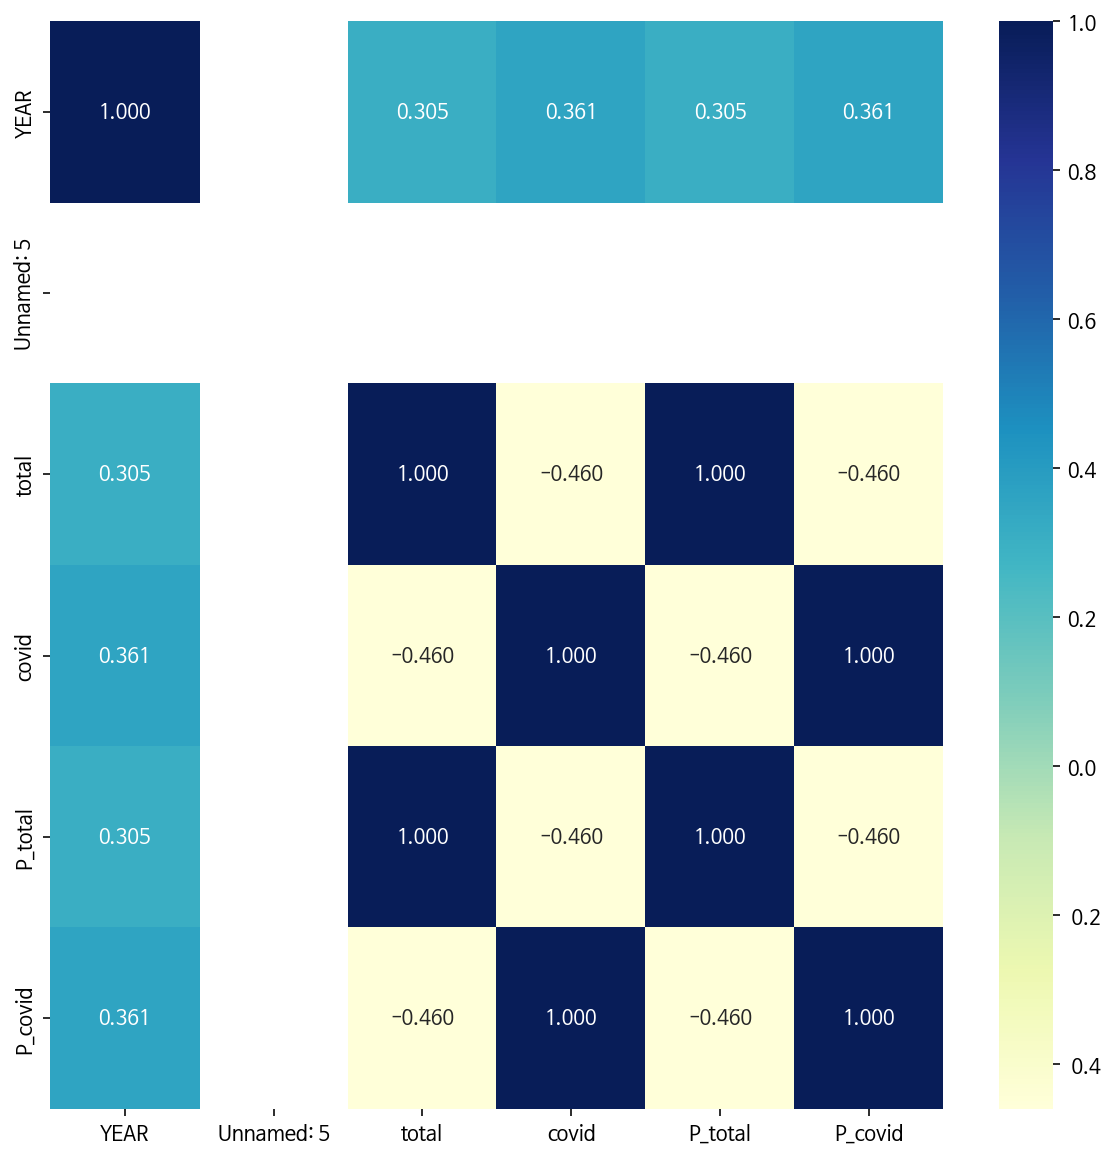

In [ ]:
# 시각화 - 히트맵
plt.figure(figsize=(10,10))
sns.heatmap(movie.corr(), annot=True, cmap='YlGnBu', fmt='.3f')
plt.savefig("test.png", dpi=200)